In [ ]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# Ordinary Differential Equations

In the following, we will work with a few numerical methods to try to solve and characterize ODEs. Since we do not want to solve ODEs explicitly, we first need an algorithm that can tackle this task. 

By far the most simple method is **Euler's method**.


## Euler's method 
For this method, we start by remembering the definition of the derivative

$$f'(t_0) = \lim_{dt\to 0} \frac{f(t_0+dt)-f(t_0)}{dt}$$

So, approximately (without the limit), the derivative of a function at a point t0 is:

$$f'(t_0) \approx \frac{f(t_0+dt)-f(t_0)}{dt}$$

In general, a first order ODE is:

$$\frac{df(t)}{dt} = f'(t) = g(f(t))$$

So, actually, in an ODE we know that the derivative of a function is equal to some other (complex) function of that function $g(f(t))$. Combining the two equations, we get for a specific point $t_0$:

$$g(f(t_0)) = \frac{f(t_0+dt)-f(t_0)}{dt}$$


And, solving for $f(t_0+dt)$, we get

$$f(t_0+dt) = g(f(t_0))*dt + f(t_0)$$

This is an iterative algorithm that allows us to move the solution to the equation a little step $dt$ forward, given that we can evaluate $g(f(t_0))$ and $f(t_0)$. 

We know $g(f(t_0))$, but we do NOT know $f(t_0)$ in general. Therefore, in order to solve this, we need to start at a certain point, which is determined by the initial conditions (also sometimes called boundary conditions). This is necessary for solving ANY ODE!

So, for a certain point $t_0$, we need to know the value of the function at that point

$$f(t_0)=x$$


## Exponential function

Let's do a simple example first. 

We would like to integrate the standard equation that gives us the exponential function.

So, we assume:

$$\frac{df}{dt} = f(t)$$

That is, the derivative of the function $f(t)$ is the function itself. 

In order to start some sort of numerical integration (and to resolve the unknown constant uniquely), we need of course to know some starting point. Let's say, we know that:

$f(0)=a$ and $a=1$

In the following code, try to implement Euler's method based on the equations given above.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# define the equation properly
# parameter a - this is simply a constant
a = 2

# now define the actual ODE with df/dt = v = ?
# this needs to be a function that receives a f-value
# and returns v, of course
def v(f):
    return(f)

# step size for Euler integration
dt = 0.001

# total number of integration steps
totNumSteps = 10000

# here let's define two arrays: one called ft 
# and another called t. ft contains the solution
# of the ODE and t contains the t-values at which
# we evaluate the solution
# 1) think about how many points we need in each array
# 2) make two arrays ft and t with np.zeros
#
ft=np.zeros(totNumSteps)
t=np.zeros(totNumSteps)

# since Euler's method is iterative, we need starting
# values for both ft and t
# think about what these are and put them in:
# 
ft[0]=a
t[0]=0

# good, now here we actually do the numerical integration
# so, we need a for-loop that goes through all the steps:
#
for i in np.arange(1,totNumSteps):
    #
    # in each step of the loop, we now integrate the
    # ODE according to Euler's method. 
    # For this, remember the definition of the derivative
    #      f'(t0) = (f(t0+dt)-f(t0))/dt
    # we do know:
    #      f(t0)     that's our starting point ft[0]
    #      dt        that's our step size
    #      f'(t0)    that's u, our function that we defined
    # we WANT to know:
    #      f(t0+dt)  that's our next point ft[<nextindex>]
    # armed with this, you should be able to solve and
    # update the next values for ft and t
    #
    ft[i]=ft[i-1]+dt*v(ft[i-1])
    t[i]=t[i-1]+dt
    

# now let's plot this and compare to the true solution
plt.plot(t,ft)
plt.plot(t,a*np.exp(t),'r--')
plt.show()


### Using `odeint` from `scipy`

Now, let's use the professional toolkit! `scipy` has a function called `odeint` that solves first-order ODEs for you using much more sophisticated algorithms (such as Runge-Kutta methods, etc.). We set this up in the following way:

In [ ]:
from scipy import integrate
from numpy import linspace,exp
import matplotlib.pylab as plt

def df_dt(y,t=0):
    # y is the current function value 
    # t is the current time point - we usually don't need to explicitly work 
    # with this, so we set this to 0 as a default argument
    
    # Change the following code to return the correct function value for the
    # ODE we want to investigate
    return(0)

# total time we want to get our data for
t = linspace(0, 10,  100)            

# initial function value
f0 = 1                    

# let's use the integration method of scipy
ft = integrate.odeint(df_dt, f0, t)

plt.plot(t,ft)
plt.plot(t,exp(t),'r--')
plt.show()

## Extending the simple example

Now, let's upgrade our population function to something nicer. Let's say, we know that food is limited and that there is a maximum population that our environment can support.

So, the ODE of growth we had before:

$$\frac{df}{dt} = f(t)$$

does not hold anymore. We need to change it to:

$$\frac{df}{dt} = f(t)*\left( 1-\frac{f(t)}{K} \right)$$

where $K$ is carrying capacity.

In [ ]:
from scipy import integrate
from numpy import linspace,exp
import matplotlib.pylab as plt

def df_dt(y,t,K):
    # y is the current function value 
    # t is the current time point - we usually don't need to explicitly work 
    # with this
    # K is an additional parameter that indicates the carrying capacity of our model
    
    # Change the following code to return the correct function value for the
    # ODE we want to investigate
    return(y*(1-y/K))

# total time we want to get our data for
t = linspace(0, 20,  100)            

# initial function value
f0 = 900             

# carrying capacity
K = 1000

# let's use the integration method of scipy
# note that "K" is passed as a tuple to scipy
ft = integrate.odeint(df_dt, f0, t, args=(K,))

plt.plot(t,ft)
plt.plot(t,exp(t),'r--')
plt.plot([0,20],[1000,1000],'k--')
plt.ylim(0,1100)
plt.show()

## Rabbits and wolves
We will have a look at the Lokta-Volterra model, also known as the predator-prey equations, which are a pair of first order, non-linear, differential equations frequently used to describe the dynamics of biological systems in which two species interact, one a predator and one its prey. They were proposed independently by Alfred J. Lotka in 1925 and Vito Volterra in 1926:

$$
\begin{eqnarray}
\frac{dR}{dt} &=&  k*R &-&   a*R*W\\
\frac{dW}{dt} &=& -r*W &+&   b*R*W\\
\end{eqnarray}
$$

with the following notations:

* $R$: number of preys (for example, rabbits)
* $W$: number of predators (for example, wolves)  
* $k, a, r, b$ as constant parameters defining the behavior of the population:
    * $k$ is the natural growing rate of rabbits, when there's no wolf
    * $a$ is the natural dying rate of rabbits, due to predation
    * $r$ is the natural dying rate of a wolf, when there's no rabbit
    * $b$ is the factor describing how many caught rabbits can support a new wolf

It is convenient to combine the two populations in one vector as follows:
$$\vec{X}=\left(
\begin{array}{c}
R\\
W\\
\end{array}
\right)$$



In [ ]:
# This example describes how to integrate ODEs with scipy.integrate module, and how
# to use the matplotlib module to plot trajectories, direction fields and other
# useful information.
# 
# This code will combine the two equations in one array:
# X=[R, W] to describe the state of both populations.
#
# Definition of the equations:
# 
from numpy import *
import matplotlib.pylab as plt

# Definition of parameters 
k = 0.08
a = 0.001
r = 0.02
b = 0.00002

def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ k*X[0] -   a*X[0]*X[1] ,  
                  -r*X[1] +   b*X[0]*X[1] ])


### Population equilibrium  
Before using solving this system, we will have a closer look at the equilibrium. 

Equilibrium occurs when the growth rate $\frac{d\vec{X}}{dt}$ is equal to 0. This gives two fixed points:

In [ ]:
# first fixed point (everything is 0)
X_f0 = array([     0. ,  0.])
# second fixed point (when dR/dt and dW/dt =0)
X_f1 = array([ r/b, k/a])
print('Second fixed point with',X_f1[0],'rabbits and',X_f1[1],'wolves')
# both points should of course have 0 growth rate,
# so let's check this in python:
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True 


### Stability of the fixed points
Near these two points, the system can be linearized:
$$\frac{d\vec{X}}{dt} \approx \mathbf{A}*\vec{X}$$
where $\mathbf{A}$ is the Jacobian matrix evaluated at the corresponding point.
$$A=\left(
\begin{array}{cc}
\frac{dR/dt}{dR}&\frac{dR/dt}{dW}\\
\frac{dW/dt}{dR}&\frac{dW/dt}{dW}\\
\end{array}
\right)$$

This is an extension of the simple Taylor expansion.

In [ ]:
# 
# Let's first define the Jacobian matrix:
# 
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[k -a*X[1],   -a*X[0]     ],
                  [b*X[1] ,   -r +b*X[0]] ])  
# 
# So, near X_f0, which represents the extinction of 
# both species, we have:
A_f0 = d2X_dt2(X_f0)
print('changes around first fixpoint:\n',A_f0)
# Near X_f0, the number of rabbits increases 
# and the population of wolves decreases.
# The origin is therefore a saddle point!
# 
# Near X_f1, we have:
A_f1 = d2X_dt2(X_f1) 
print('changes around second fixpoint:\n',A_f1)

# The eigenvalues of the Jacobian are +/- sqrt(k*r)*j
lambda1, lambda2 = linalg.eigvals(A_f1) 
print('\ncalculated eigenvalues:\n',lambda1,lambda2,"\ncompare with theoretical",sqrt(k*r))

# They are imaginary numbers, so that the wolf and 
# rabbit populations are periodic and their approximate 
# period will be given by:
T_f1 = 2*pi/abs(lambda1)
print('\n\napproximate period of wolf/rabbit population:\n',T_f1)

### Integrating the ODE using scipy.integate 
Now we will use the scipy.integrate module to integrate the ODEs. In addition, we will be using the solution to try and find the actual period.

In [ ]:

from scipy import integrate, signal

# total time we want to get our data for
t = linspace(0, 1500,  1000)            

# initial population of rabbits and wolves
X0 = array([1000, 40])                    

# let's use the integration method of scipy
X = integrate.odeint(dX_dt, X0, t)

# We can now use Matplotlib to plot the 
# evolution of both populations:

rabbits, wolves = X.T

# find the peaks in the signal
rp=signal.find_peaks_cwt(rabbits,[10,1000])
wp=signal.find_peaks_cwt(wolves,[10,1000])

# since we have a periodic signal, the period is 
# (hopefully) the distance between the first two peaks
rperiod=t[rp[1]]-t[rp[0]]
wperiod=t[wp[1]]-t[wp[0]]

f1,ax1 = plt.subplots()
ax1.plot(t, rabbits, 'r-', label='Rabbits')
ax1.grid()
ax1.set_xlabel('time')
ax1.set_ylabel('rabbit population',color='r')
ax1.tick_params('y', colors='r')
ax2=ax1.twinx()
ax2.plot(t, wolves  , 'b-', label='wolves')
ax2.set_ylabel('wolf population',color='b')
ax2.tick_params('y', colors='b')
plt.title('Rabbit and wolf populations\nRabbit period %i, Wolf period %i'%(rperiod,wperiod))
plt.show()
f1.savefig('rabbits_and_wolves_1.png')

### Plotting direction fields and trajectories in the phase plane
We will plot some trajectories in a phase plane for different starting points between X_f0 and X_f1.
 
We will use matplotlib's colormap to define colors for the trajectories. These colormaps are very useful to make nice plots. Have a look at 

http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps 

if you want more information.

In [ ]:
# we wil evaluate points between the two
# equilibrium points X_f0 and X_f1
values  = linspace(0.3, 0.9, 5)
# let's get some fancy colors for each trajectory
vcolors = plt.cm.autumn_r(linspace(0.3, 1., len(values)))  
f2 = plt.figure()

# plot trajectories
for v, col in zip(values, vcolors): 
    # starting point
    X0 = v * X_f1
    # integrate the ODE for the times and starting points
    X = integrate.odeint( dX_dt, X0, t)
    # plot the trajectory with varying linewidth and color
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
    plt.plot( X0[0], X0[1], 'xk')
    
# define a grid and compute direction at each point
# get axis limits
ymax = plt.ylim(ymin=0)[1]                        
xmax = plt.xlim(xmin=0)[1] 
nb_points   = 30                      

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)
# create a grid with the axis limits
X1 , Y1  = meshgrid(x, y)    
# compute growth rate on the grid!
DX1, DY1 = dX_dt([X1, Y1])    
# Norm of the growth rate 
M = sqrt(DX1**2+DY1**2)     
# Avoid zero division errors - for example, 
# in case we hit the stability point!
M[ M == 0] = 1.      
# Normalize each arrow by the growth rate's norm
DX1 /= M                                        
DY1 /= M                                  

#-------------------------------------------------------
# Draw direction fields, using matplotlib's quiver-function
# Arrows are plotted in the same size, but colors are used 
# to give information about the growth speed
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of wolves')
plt.legend()
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()
f2.savefig('rabbits_and_wolves_2.png')
# 
# 
# We can see on this graph that an intervention for
# both wolf or rabbit populations can have non-intuitive 
# effects. If, in order to decrease the number of rabbits,
# we introduce wolves, for example, this can lead to an 
# **increase** of rabbits in the long run, if that 
# intervention happens at a bad moment.


## Epidemics
Let's study a three-way coupled ODE. For this, we take a look at a simple model of epidemics proposed first in 1927 by Kermack and McKendrick (Proc. R. Soc. A, 115, 772 (1927)). In order to model the dynamics of populations, we assume that we have three sub-populations S,I,R:

* S(t): the number of people, who are susceptible to the epidemic (the not-yet infected)
* I(t): the number of infected people
* R(t): the number of people, who are removed from the total population - either because they have become immune or because they die

For this SIR-model, we need additional parameters now to describe what happens when one population comes into contact with another. 

Similarly to the predator/prey model, we assume that if an infected person from I meets a susceptible person from S, I will infect S. The rate at which they meet is proportional to $S*I$. Let's call this contact probability $a/N$, where $N$ is the total number of people in the population. 

Next, we need to say what happens to the people who become infected. Let's assume that there is a certain time period, during which they can pass on the disease, after which they either become immune or (sadly) die. This process is governed by another time constant $b$ and takes away people from $I$ and adds to $R$.

Now, we need to set up the dynamics. As usual, we of course model the change in time in these populations:

* $\frac{dS}{dt}=-a/N*I*S$
* $\frac{dI}{dt}=a/N*I*S-b*I$
* $\frac{dR}{dt}=b*I$


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# total population of interest: N.
N = 1000
# initial number of infected and recovered individuals
# at t=0: I0 and R0.
I0, R0 = 100, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, a, and mean removal rate, b
# the contact rate is divided by the population count
# the removal rate is given in 1/t units
# so, if we assume days as our time unit, then 1/10 would
# be a removal rate of 10 days, in other words, people 
# stay infectious for 10 days!
a, b = 0.2/N, 1./5
# A grid of time points (in days)
t = np.linspace(0, 160, 160)


In [3]:
# Let's define the ODE system here for the SIR equations:
def sir(y,t,a,b):
    S, I, R = y #remember that odeint deals with a vector!
    dS_dt = -a*I*S
    dI_dt = a*I*S - b*I
    dR_dt = b*I
    return dS_dt, dI_dt, dR_dt

# Here, we need to define our initial state:
y0 = S0,I0,R0
# Now, use odeint to integrate this over the time interval
# to get the populations of interest
p = odeint(sir,y0,t,args=(a,b))
S, I, R = p.T

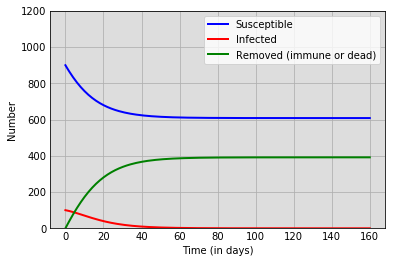

In [4]:
# Here, we plot the data
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t,S, 'b', lw=2, label='Susceptible')
ax.plot(t,I, 'r', lw=2, label='Infected')
ax.plot(t,R, 'g', lw=2, label='Removed (immune or dead)')
ax.set_xlabel('Time (in days)')
ax.set_ylabel('Number')
ax.set_ylim(0,1200)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
ax.legend()
plt.show()

As an aside, if we simplify the model to **not** include the R-population, the two remaining equations become:

* $\frac{dS}{dt}=-a/N*I*S$
* $\frac{dI}{dt}=a/N*I*S$

where we have omitted the second term, since we do not take away from the I-population to the R-population anymore.

Now, this is a coupled, symmetric equation, that we can actually transform into one by realizing that I+S=N for all time-points. Therefore:

$\frac{dI}{dt}=a/N*I*(N-I)=a*I*(1-\frac{I}{N})$

And this is the logistic equation we had before. Therefore,  a simple, one-stage epidemic model is one in which both populations behave logistically.

## Chaos
Let's start with a very similar system to the pendulum that we had before:

$\frac{d^2 x}{dt^2}+k*\frac{dx}{dt}+x^3=F*\cos{t}$

The first term is simply the standard force term, the second term comes from friction.

For the two other terms, we have included two effects: first of all, we have introduced a non-linear term that indicates that some returning force of the pendulum is non-linearly dependent on the angle. One way to think about this is to imagine that we hook up the pendulum to a spring that dampens the oscillation - if the spring is a "simple" spring, the returning force will be linearly dependent on x, but for "realistic" springs a non-linear dependency is a better model. Second, we now have an external force that drives our pendulum. We introduce this as an oscillating force.

In [5]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# we import this in order to make animations
from matplotlib import animation, rc
# we import this in order to show these in ipython
from IPython.display import HTML

# define the UEDA ODE
def chaosODE(y,t,k,F):
    a,b = y
    # do this similarly to the pendulum!!
    da_dt = b
    db_dt = F*np.cos(t)-k*b-a**3
    return da_dt,db_dt

# these parameters are the ones studied by Ueda
k = 0.05
F = 7.5

# initial values: angle = 1, speed = 0
# since there is an outside force, the system will move!
a0=1
b0=0
# combine into vector
x0=a0,b0
# time-points to calculate
t=np.linspace(0,1000,10001)

# integrate system and save solutions
r = odeint(chaosODE,x0,t,args=(k,F))
a,b=r.T

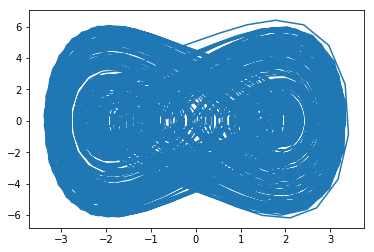

In [6]:
# plot the solutions in one plot
plt.figure()
plt.plot(a,b)
plt.show()

In [7]:

# plot the solutions
fig, ax = plt.subplots()
# set limits
ax.set_xlim((-10, 10))
ax.set_ylim((-10, 10))
# this is needed for the animation - here, we initialize
# a plot with empty data and retrieve its handle
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of 
# each frame, which in our case simply means an empty plot
def init():
    line.set_data([], [])
    return (line,)

# animation function: this function is called with the
# parameter i, where i is the framecount
def animate(i):
    # simply choose the first i elements of our solution
    line.set_data(a[:i], b[:i])
    return (line,)

# plot the animation
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=20, blit=True)
# show the animation inline in ipython - this 
# writes a video file to disk and loads it into the browser
HTML(anim.to_html5_video())

RuntimeError: No MovieWriters available!

As we can see, the solution is not periodic and the orbit never settles. This means that the system's behavior is erratic.

This chaotic behavior can also be seen in the evolution of the speed and the angle over time:

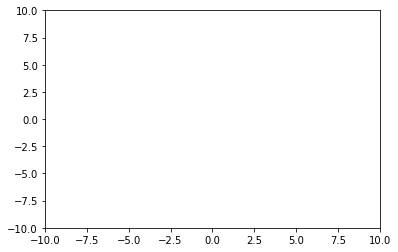

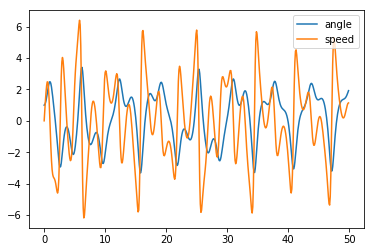

In [8]:
plt.figure()
plt.plot(t[:500],a[:500],label='angle')
plt.plot(t[:500],b[:500],label='speed')
plt.legend(loc='best')

# the following is a fancy method of measuring the degree of chaos
# if you are interested...
#import nolds
#l1 = nolds.lyap_r(a)
#l2 = nolds.lyap_r(b)
#plt.title('Lyapunov Exponent of angle = {:.3f}, speed = {:.3f}'.format(l1,l2))

plt.show()


In order to visualize this even further, we can integrate the system for a much longer time and then plot a few snapshots of the system into a scatter plot.

In [ ]:
# much longer time!
t = np.linspace(0, 2*np.pi*10000, 100000001)

# integrate system and save solutions
r = odeint(chaosODE,x0,t,args=(k,F))
a,b=r.T

# for this, we don't want to plot every point,
# but just every 10000th point:
plt.figure()
plt.scatter(a[30000::10000],b[30000::10000],s=3)
plt.show()

This picture shows the chaotic nature of the system. Note, that "chaotic" in this case does not mean "non-deterministic". In fact, the equation is not at all stochastic in nature - there is no "random" component in the definition of the ODE! 

In addition, the shape you are seeing above here is characteristic of that ODE's solutions and will never be left by the speed/angle combinations. We call this shape an "attractor".

The insight that determinism and chaotic behavior are independent properties of dynamic systems has led to a very fundamental rethinking of our understanding of such systems - the most famous example being the butterfly that causes a hurricane!

Before we go on, can we make this system non-chaotic? Let's try a few things:

In [ ]:
# change the parameters
ks = np.linspace(0,0.1,5)
Fs = np.linspace(0,15,6)

# initial values: angle = 1, speed = 0
# since there is an outside force, the system will move!
a0=1
b0=0
# combine into vector
x0=a0,b0
# time-points to calculate
t=np.linspace(0,1000,10001)
# create figure (make size a little larger)
fig = plt.figure(figsize=(12, 10))
# counter for subplots
sc = 0
for kc in ks:
    for Fc in Fs:
        sc+=1
        fig.add_subplot(5,6,sc)
        # integrate system and save solutions
        r = odeint(chaosODE,x0,t,args=(kc,Fc))
        a,b=r.T
        plt.plot(a,b,lw=1)
        plt.xlim([-7,7])
        plt.ylim([-7,7])
        plt.grid()
        # here is another, more Pythonic way to format strings:
        plt.title('k = {:.3f}, F = {:.3f}'.format(kc,Fc))

# this leads matplotlib to optimize the layout again
plt.tight_layout()
plt.show()

## More Chaos
Alright, now that we've encountered chaotic behavior in a rather "simple" system, let's check one of the more famous systems that is associated with this phenomenon.

In the 1960s, Edward Lorenz was investigating models of weather processes. These were (and are) often modeled as highly coupled, dynamic systems. 

Just to scare people, the very, very simplified equations that were used as the start are derived from thinking about convection, that is, the distribution of temperature in a volume. This was already studied by Rayleigh in the early 1900s, assuming a layer of fluid, in which the top is held at a constant temperature difference from the bottom. Assuming, that motion in the fluid can only occur parallel to the x-z-plane, one can then write the following two partial derivative equations:

* $\frac{\partial}{\partial t}\nabla^2\psi=-\frac{\partial(\psi,{\nabla}^2\psi)}{\partial(x,z)}+\nu{\nabla}^4\psi+g\alpha\frac{\partial \theta}{\partial x}$
* $\frac{\partial}{\partial t}\theta=-\frac{\partial(\psi,\theta)}{\partial(x,z)}+\frac{\Delta T}{H}\frac{\partial \psi}{\partial x}+\kappa{\nabla}^2\theta$

Here, $\psi$ is a stream function for two-dimensional motion, $\theta$ is the departure of temperature from the temperature in the state of no convection (the steady state), $g$ is the gravitational constant, $\alpha$ the coefficient of thermal expansion, $\nu$ the kinematic viscosity, and $\kappa$ the thermal conductivity of the liquid.

In order to study these rather intricate equations, Lorenz first simplified these to a set of three equations, by assuming that it is possible to write the solutions $\psi,\theta$ as oscillations in x-z:  

* $\psi \approx X(t)\sin(x)\sin(z)$
* $\theta \approx Y(t)\cos(x)\sin(z)-Z(t)sin(z)$

This yields the now-famous Lorenz equations, relating three convection states $X(t),Y(t),Z(t)$ with three parameters $s,r,b$ to each other. The equations are as follows:

* $\frac{dX}{dt}=s*(Y-X)$
* $\frac{dY}{dt}=r*X - Y - X*Z$
* $\frac{dZ}{dt}=X*Y - b*Z$

In this system, $X$ describes the intensity of the convection, $Y$ describes the temperature difference between rising and falling currents, and $Z$ describes the distortion of the vertical temperature profile from linear (i.e., the steady-state). $s=\frac{\nu}{\kappa}$ is the Prandtl number, $r$ is related to the Rayleigh number that chacterizes turbulent flow, and $b=2.667$.

This set of equations is only accessible numerically, and in addition one should not forget is only a very crude approximation of the original partial derivative equation!

In any case, Lorenz proceeded to test solutions to this on a computer. One day, after the computer had printed out a set of solutions, Lorenz wanted to continue at a previous time-point. Not wanting to re-run the whole simulation (which had taken days to compute!), he entered the rough numbers from the print-out and re-started the calculation at that time. When he came back, the solution to the ODEs had diverged drastically, even though the initial values were very close together. When investigating the properties of this system in more detail, he found out that arbitrarily-close initial solutions would end up at arbitrarily-far points later in phase space - the Butterfly effect!

In the following, we will implement this system and show the evolution of the three system parameters over time.

In [ ]:
#% matplotlib inline #faster, shows just a picture
% matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

def lorenz(data, t, s=10, r=28, b=2.667):
    x,y,z=data
    dx_dt = s*(y-x)
    dy_dt = r*x - y - x*z
    dz_dt = x*y -b*z
    return dx_dt,dy_dt,dz_dt

# initial parameters
x0,y0,z0 = (0., 1., 1.05)
# make vector
s0 = x0,y0,z0
# time for integration
t = np.linspace(0,100,10000)
# integrate and save solution
r = odeint(lorenz,s0,t)
x,y,z = r.T
# make new figure
fig = plt.figure()
# tell matplotlib that axis should have 3D property
ax = fig.gca(projection='3d')
# plot the data in 3D with very thin lines
ax.plot(x, y, z, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")

plt.show()

As we can see, the characteristic two lobes of the famous attractor appear. The system will forever loop through these lobes, never entering a stationary, repeating orbit. 

Although the Butterfly-effect states that the two states are "far" away, it should be noted that the solution-space itself is bounded! Hence, the solutions themselves occupy only a certain part of the space - the attractor "volume".

Let's say that these equations are a good model of weather (after all, convection of temperature is a big part of weather mechanics). Now, we have seen that initial values tend to get spread out after time. So, how close do they need to be in order for us to get reliable prediction accuracies? 

For this, let's assume that reliable predictions for four days of weather would be possible with an initial accuracy from 1000 weather stations evenly distributed over the earth's surface. 

Then the "chaos" inherent in these equations tell us that an equally reliable forecast for 11 days the number of required weather stations increases to 100 million stations. And for predictions over a whole month, an amount of 10^20 stations would be needed - one per 5 square millimeters of earth surface!

# Partial Differential Equations
We already had seen above that more complex phenomena require functions of many variables, i.e., the convection functions are dependent on space AND time. Hence, the equations will describe how changes in space or time are related to each other, resulting in partial differential equations.

One of the most simple equations is the heat equation, first studied by Jean Baptiste Fourier. In its most basic form, the equation describes how heat (i.e., temperature) as a function of space and time evolves:

* $\frac{\partial}{\partial t}U(x,t) = k*\frac{\partial^2}{\partial x^2}U(x,t)$

So the time derivative of temperature is equal to its double space derivative (up to a constant $k$, which specifies the heat conductivity).

Fourier showed that possible solutions to this equation (under certain circumstances) are periodic functions - and with this established Fourier analysis.

Here, we will not do this, but rather do the brute force, numerical approach  to solving this.

We already can assume that:

$\frac{\partial U(x,t)}{\partial t} \approx \frac{U(x,t+dt)-U(x,t)}{dt}$

Now, we need to work with the second derivative next:

$\frac{\partial^2 U(x,t)}{\partial x^2}\approx \frac{U'(x,t)-U'(x-dx,t)}{dx}$

and:

$\frac{\partial U(x,t)}{\partial x} \approx \frac{U(x+dx,t)-U(x,t)}{dx}$

so:

$\frac{\partial U(x-dx,t)}{\partial x} \approx \frac{U(x,t)-U(x-dx,t)}{dx}$

together:

$\frac{\partial^2 U(x,t)}{\partial x^2}\approx \frac{U(x+dx,t)-U(x,t)-U(x,t)+U(x-dx,t)}{dx^2} = \frac{U(x+dx,t)-2*U(x,t)+U(x-dx,t)}{dx^2}$

So, for the heat equation, we have:

$\frac{U(x,t+dt)-U(x,t)}{dt}=k*\frac{U(x+dx,t)-2*U(x,t)+U(x-dx,t)}{dx^2}$

If we want to integrate explicitly across time, then if we know the values at time $t$, we can find out the value at time $t+dt$:

$U(x,t+dt)=U(x,t)+c*\left( U(x+dx,t)-2*U(x,t)+U(x-dx,t) \right)$

with $c=k*\frac{dt}{dx^2}$

So now we finally have a good iterative method that allows us to solve the equation, given a set of starting values. Unfortunately, these equations usually require two sets of additional conditions in order to be solved:

* a set of initial conditions, for example, the temperature function $U(x,t=0)$
* a set of boundary conditions, for example, the temperature should be a certain value at $U(x=0,t)$ and $U(x=end,t)$

In our case, let's say that our problem should be modeled for a short piece of one-dimensional metal that goes from $x=0$ to $x=1$. The initial temperature at $t=0$ for the metal is given as: $U(x,t=0) = \sin(x)$ and the boundary conditions are such that the temperature should be $U(x=0,t)=10$ and $U(x=1,t)=15$ for all times - in other words, we are supplying constant heat to both ends of the metal.

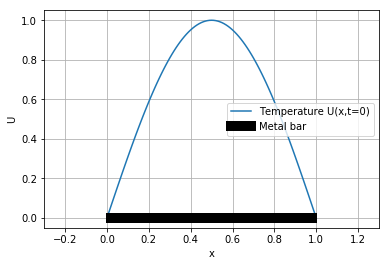

In [1]:
import numpy as np
import matplotlib.pyplot as plt

xv=np.linspace(0,1,101)
plt.figure()
plt.plot(xv,np.sin(np.pi*xv),label='Temperature U(x,t=0)')
plt.plot(xv[2:99],np.zeros(np.shape(xv[2:99])),'k',lw=10,label='Metal bar')
plt.xlim([-0.3,1.3])
plt.grid()
plt.xlabel('x')
plt.ylabel('U')
plt.legend(loc='best')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# this tells us how many points we want to simulate in x
x_num = 21
# problem domain from 0 to 1
x_min = 0.0
x_max = 1.0
# then dx - the distance between points is:
dx = ( x_max - x_min ) / ( x_num - 1 )
# and we create a set of points in x:
x = np.linspace ( x_min, x_max, x_num )

# we want to simulate more points in time t
t_num = 2001
# this is the time course from 0 to 280
t_min = 0.0
t_max = 280.0
# that gives us dt
dt = ( t_max - t_min ) / ( t_num - 1 )
# and we create a set of points in t:
t = np.linspace ( t_min, t_max, t_num )

# this is the heat conductivity - we set this to be small
k= 0.002

# and from this, we determine the c-factor from above
# for numerical stability, this has to be cfl<=0.5
cfl=k*dt/dx/dx

assert cfl<=0.5, "caution: cfl={:.03f} is larger than 0.5".format(cfl)

# now, let's create a grid of solutions in t and x
u=np.zeros((len(t),len(x)))

# and initialize it with our initial conditions U(x,t=0)
u[0,:]=np.sin(np.linspace(0,np.pi,len(x)))
# here are the boundary conditions
u[:,0]=0
u[:,-1]=0
# and this is the loop that does the work
# for each time point
for ti in range(1,len(t)):
    # for each point in x
    for xi in range(1,len(x)-1):
        # go one forward in time given the previous points
        u[ti,xi] = u[ti-1,xi] + cfl* (u[ti-1,xi-1] -2*u[ti-1,xi]+ u[ti-1,xi+1])

<IPython.core.display.Javascript object>


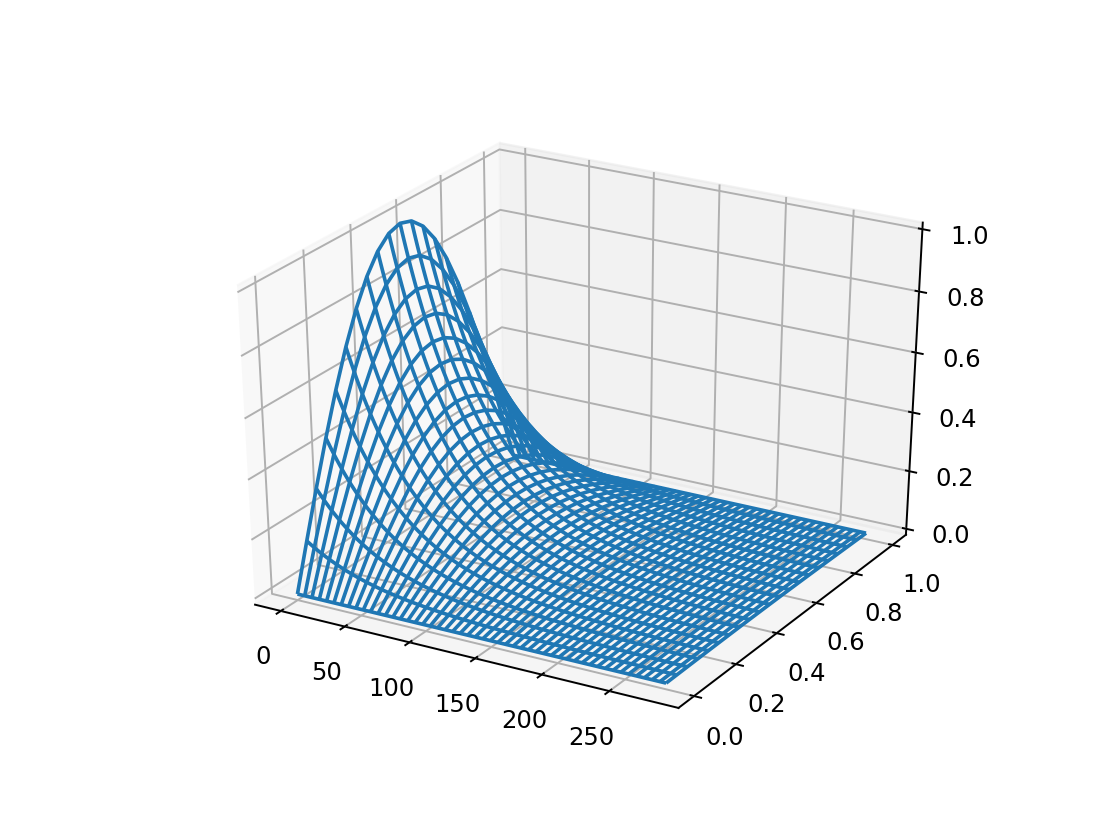

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
tp,xp=np.meshgrid(t,x)
ax.plot_wireframe(tp,xp,u.T)
plt.show()

# Homogenous and particular solutions
Let's return to our beloved, standard, linear pendulum:

$a*x^{''}(t)+b*x^{'}(t)+c*x(t)=F(t)$

This is a second-order ODE with an outside function that "drives" the pendulum. 

## Homogenous ODE

Now, let's take a look at the pendulum without this driving function:

$a*x^{''}(t)+b*x^{'}(t)+c*x(t)=0$

We call this the **homogenous** ODE and solutions to this ODE are called **homogeneous** solutions.

Let's try to solve this first, before going on. Let's try to find a homogeneous solution $x_h(t)$ and let's make things specific, so we say $a=1, b=3, c=1$. 

Somehow, whenever linear derivatives of some things crop up, it is always a good idea to use the good old exponential, so:

$x_h(t)=q*e^{r*t}$

Let's put this into our equation:

$1*r^2*x_h(t)+3*r*x_h(t)+1*x_h(t)=0$

So:

$x_h(t)*(1*r^2+3*r+1)=0$

which either implies $x_h(t)=0$ (boring!), or $1*r^2+3*r+1=0 \rightarrow r_1=-2.618, r_2=-0.382$. $1*r^2+3*r+1=0$ is called the characteristic polynomial of the homogenous ODE and it determines the solution possibilities. 

Note, that in general a polynomial can have real and complex roots. In our case, the roots are real, which means that the damping forces are much stronger than the oscillation forces and hence the system will exponentially decay. If the parameters $a,b,c$ had been different, we could have gotten complex roots and that would mean potentially oscillating functions, since $e^{it}=\cos(t)+i*\sin(t)$

So, we have two solutions here, which we can simply add together to yield:

$x_h(t)=q_1*e^{-2.618t}+q_2*e^{-0.382t}$



Now we have found a general **homogenous** solution, let's try to go further in solving the full equation. 

## Theorem

There is an easy-to-prove theorem that says the following:

<div style="background-color:rgba(0, 0, 0, 0.0470588); vertical-align: middle; padding:20px 0;">
Suppose that $X_1(t)$ and $X_2(t)$ are two solutions to the full equation and that $x_{h1}(t)$ and $x_{h2}(t)$ are a fundamental set of solutions to the associated homogeneous differential equation, then $X_1(t)-X_2(t)$ is a solution to the homogenous equations and one can write:
<div style="text-align: center; padding:20px 0;">
$X_1(t)-X_2(t)=c_1*x_{h1}(t)+c_2*x_{h2}(t)$
</div>
</div>

So, what does this buy us? Well, let's imagine, we know one particular solution $x_p(t)$ to our full equation, and we also have the general solution $x(t)$ that - of course - solves the full equation as well. Then, we know that:

$x(t)-x_p(t)=c_1*x_{h1}(t)+c_2*x_{h2}(t) \rightarrow x(t)=c_1*x_{h1}(t)+c_2*x_{h2}(t)+x_p(t)$

Aha - so we know now that in order to find the general solution $x(t)$, we need to solve the homogenous equations and find **one** particular solution (any solution is fine!). The coefficients $c_1,c_2$ are then determined by the initial values of the ODE to make everything work out fine!

## Example: finding particular solution with exponential driving force
Now, let's come back to our full, driven ODE and let's make a choice about $F(t)$, let's say $F(t)=2*e^{-t}$ - a decaying external force.

$1*x^{''}(t)+3*x^{'}(t)+1*x(t)=2*e^{-t}$

We already have the solution to the homogenous problem: $x_h(t)=q_1*e^{-2.618t}+q_2*e^{-0.382t}$. We now need to find one particular solution to this ODE. Because we have an exponential lurking there and differentiations don't do much to exponentials, we perhaps can assume that a particular solution should be very similar:

$x_p(t)=A*e^{-t}$

If we put this in, we get:

$A*e^{-t}-3*A*e^{-t}+A*e^{-t}=2*e^{-t}\rightarrow A=-2$


### Making the full solution
So, by virtue of our theorem, the full solution is:

$x_h(t)+x_p(t)=q_1*e^{-2.618t}+q_2*e^{-0.382t}-2e^{-t}$

### Solving the full ODE
In order to solve this, we should provide some initial values. So let's choose the initial position to be $x(0)=5$ and the initial speed to be $x^{'}(0)=5$.

The first condition means:

$q_1+q_2-2=5$

And the second condition means:

$-2.618*q_1-0.382*q_2+2=5$

$\rightarrow q_1=-2.5376, q_2=9.5376$ and

$x(t)=-2.5376*e^{-2.618t}+9.5376*e^{-0.382t}-2e^{-t}$

In [ ]:
t = np.linspace(0,10,1000)
plt.figure()

plt.plot(t,-2.5376*np.exp(-2.618*t)+9.5376*np.exp(-0.382*t)-2*np.exp(-t),label='position')
plt.plot(t,-2.618*(-2.5376)*np.exp(-2.618*t)+(-0.382)*9.5376*np.exp(-0.382*t)+2*np.exp(-t),label='velocity')
plt.legend(loc='best')

## Finding a particular solution: the general case
If we change the driving function to something else, then we should also change our guess of the particular solution. In general:

* if the driving function is exponential, we guess $x_p(t)=A*e^{-t}$
* if it is periodic, we guess $x_p(t)=A*\sin(t)+B*\cos(t)$
* if it is a polynomial of degree $N$, we guess $x_p(t)=\sum_{i=0}^{N}A_i t^i$

If the driving function is none of these, we need to revert to other techniques that involve explicit integration of the function!

## Example: periodic driving force

Let's change to a periodic force:

$1*x^{''}(t)+3*x^{'}(t)+1*x(t)=\sin(t)$

So, we assume:

$x_p(t)=A*\sin(t)+B*\cos(t)$

If we put this in, we get:

$-A*\sin(t)-B*\cos(t)+3*A*\sin(t)-3*B*\cos(t)+A*\sin(t)+B*\cos(t)=\sin(t) \rightarrow A*\sin(t)+B*\cos(t)=\sin(t)$

In general, all $\sin$ and all $\cos$ coefficients need to be equal. So: $A=1$ and $B=0$ (note, that normally, things do not cancel out so nicely!!).


### Making the full solution
So, by virtue of our theorem, the full solution is:

$x_h(t)+x_p(t)=q_1*e^{-2.618t}+q_2*e^{-0.382t}+\sin(t)$


### Solving the full ODE
With the same initial values, $x(0)=5$ and $x^{'}(0)=5$:

The first condition means:

$q_1+q_2=5$

And the second condition means:

$-2.618*q_1-0.382*q_2+1=5$

$\rightarrow q_1=-2.6431, q_2=7.6431$ and

$x(t)=-2.1959*e^{-2.618t}+7.6431*e^{-0.382t}+\sin(t)$



In [ ]:
t = np.linspace(0,10,1000)
plt.figure()

plt.plot(t,-2.6431*np.exp(-2.618*t)+7.6431*np.exp(-0.382*t)+np.sin(t),label='position')
plt.plot(t,-2.618*(-2.6431)*np.exp(-2.618*t)+(-0.382)*7.6431*np.exp(-0.382*t)+np.cos(t),label='velocity')
plt.legend(loc='best')

## Homogenous solution: complex roots

As stated above, by changing the parameters of our equation, we can get imaginary roots. So let's make the pull-back force much stronger:

$1*r^2*x_h(t)+3*r*x_h(t)+10*x_h(t)=0$

So:

$x_h(t)*(1*r^2+3*r+10)=0$

which either implies $x_h(t)=0$ (again boring!), or $1*r^2+3*r+10=0 \rightarrow r_1=-1.5000 + 2.7839i, r_2=-1.5000 - 2.7839i$. Rearranging terms, we get $e^{-1.5t}(e^{2.7839it}+e^{-2.7839it})=2e^{-1.5t}\cos(2.7839t)$.

In general, then we also can do $\sin$-functions as the solutions to the homogenous equations. In fact, we have a full homogeneous solution as:

$x_h(t)=e^{-1.5t}(q_1*\sin(2.7839t)+q_2*\cos(2.7839t))$

## Example: exponential driving force with complex roots

Let's chose the driving function to be exponential again:

$1*x^{''}(t)+3*x^{'}(t)+10*x(t)=e^{-t}$

and assume that our solution is of the same kind:

$x_p(t)=A*e^{-t}$

If we put this in, we get:

$A*e^{-t}-3*A*e^{-t}+10*A*e^{-t}=2*e^{-t}\rightarrow A=0.25$

### Making the full solution
So, by virtue of our theorem, the full solution is:

$x_h(t)+x_p(t)=e^{-1.5t}(q_1*\sin(2.7839t)+q_2*\cos(2.7839t))+0.25e^{-t}$

### Solving the full ODE
Let's solve this for the same initial position $x(0)=5$ and initial speed of $x^{'}(0)=5$.

The first condition means:

$q_2+0.25=5$

And the second condition means:

$-1.5*(q_2)+2.7839*q_1-0.25=5$

$\rightarrow q_1=4.4452, q_2=4.7500$ and

$x(t)=e^{-1.5t}(4.4452*\sin(2.7839t)+4.7500*\cos(2.7839t))+0.25e^{-t}$

In [ ]:
t = np.linspace(0,10,1000)
plt.figure()
y = np.exp(-1.5*t)*(4.4452*np.sin(2.7839*t)+4.7500*np.cos(2.7839*t))+0.25*np.exp(-t)
yp = -1.5*np.exp(-1.5*t)*(4.4452*np.sin(2.7839*t)+4.7500*np.cos(2.7839*t))+np.exp(-1.5*t)*(2.7839*4.4452*np.cos(2.7839*t)-2.7839*4.7500*np.sin(2.7839*t))-0.25*np.exp(-t)
plt.plot(t,y,label='position')
plt.plot(t,yp,label='speed')
plt.plot(t,y-0.25*np.exp(-t),label='homogenous solution')
plt.legend(loc='best')


Note the difference in shape between an external periodic driving force and an "internal", periodic solution!